# Optimizing AdaBoost parameters with all features of the prepared files 

In [107]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklift.models import ClassTransformation
from sklift import metrics
from sklift.viz import plot_qini_curve
import chime

In [2]:
%load_ext chime

In [3]:
clients = pd.read_csv('clients_train_modified.csv', index_col='client_id')
clients

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,6.425000,25.7,0.000,0.0,0.000000,0.0,0.000000,0.0,700.750000,2803.00,17383,17535,45.000000,0,0,0
000036f903,1.715625,54.9,1.875,60.0,0.000000,0.0,0.000000,0.0,306.406250,9805.00,17266,17279,72.000000,1,0,0
0001f552b0,5.260000,78.9,0.000,0.0,0.000000,0.0,0.000000,0.0,410.345333,6155.18,17347,17771,33.000000,1,0,0
00020e7b18,15.894444,286.1,0.000,0.0,-32.888889,-592.0,-1.666667,-30.0,1434.422778,25819.61,17497,17541,73.000000,0,0,0
000220a0a7,6.940000,104.1,0.000,0.0,0.000000,0.0,0.000000,0.0,573.771333,8606.57,17509,17808,46.379533,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,1.950000,35.1,0.000,0.0,0.000000,0.0,0.000000,0.0,318.423889,5731.63,17343,17797,47.000000,0,1,0
fffd63dfe3,1.625000,6.5,0.000,0.0,0.000000,0.0,0.000000,0.0,335.127500,1340.51,17312,17578,31.000000,0,0,0
fffd8c9d7d,2.200000,11.0,0.000,0.0,0.000000,0.0,0.000000,0.0,327.306000,1636.53,17582,17712,48.000000,1,0,0


In [4]:
x_cols = clients.columns

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(clients)

StandardScaler()

In [7]:
clients_scaled = pd.DataFrame(scaler.transform(clients),
                              columns=x_cols,
                             index=clients.index)
clients_scaled

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,0.326493,-0.544865,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.547587,-0.653612,-0.771133,-0.856385,-0.087757,-0.763412,-0.449111,-0.311067
000036f903,-0.597875,-0.239623,3.369176,7.499476,0.433102,0.563999,0.246932,0.395964,-0.504430,0.138021,-1.344979,-1.862848,1.615961,1.309908,-0.449111,-0.311067
0001f552b0,0.097824,0.011260,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.227145,-0.274621,-0.947701,0.071448,-0.844965,1.309908,-0.449111,-0.311067
00020e7b18,2.185181,2.177224,-0.072084,-0.102507,-3.206022,-4.001476,-0.403913,-1.443925,2.504855,1.948604,-0.212002,-0.832796,1.679061,-0.763412,-0.449111,-0.311067
000220a0a7,0.427579,0.274688,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.208837,0.002529,-0.153146,0.216913,-0.000708,-0.763412,2.226620,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,-0.551871,-0.446602,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.472370,-0.322507,-0.967320,0.173667,0.038444,-0.763412,2.226620,-0.311067
fffd63dfe3,-0.615663,-0.745572,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.427809,-0.818959,-1.119365,-0.687331,-0.971167,-0.763412,-0.449111,-0.311067
fffd8c9d7d,-0.502801,-0.698532,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.448675,-0.785491,0.204895,-0.160510,0.101545,1.309908,-0.449111,-0.311067


In [8]:
df_full = pd.read_csv('train.csv', index_col='client_id')\
    .join(clients_scaled, how='left')
df_full

,treatment_flg,purchased,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,,,
ad6561e2d8,1,1,-0.457165,0.203605,-0.072084,-0.102507,0.256063,0.070434,0.246932,0.395964,-0.601460,0.250673,-0.182574,-0.309907,0.227746,1.309908,-0.449111,-0.311067
7c1ccbf93f,1,1,-0.012094,-0.715257,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.186716,-0.874302,-0.295381,-0.663742,-1.412871,1.309908,-0.449111,-0.311067
b58fadcab6,1,1,-0.390384,0.142974,-0.072084,-0.102507,-0.602976,-1.818994,0.246932,0.395964,-0.176185,0.631720,-0.334618,0.142215,-0.655663,-0.763412,-0.449111,-0.311067
e99e6fabb9,0,0,-0.729281,-0.671353,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.732479,-0.645811,0.621791,-0.282386,2.057665,1.309908,-0.449111,-0.311067
27fb6f8520,1,1,-0.396808,0.045757,1.151475,2.431487,0.418348,0.533151,-0.403913,-2.670518,-0.442714,0.147202,-0.864322,-0.935015,-0.781865,1.309908,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,1,1,0.758315,-0.452875,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.664302,-0.633827,1.445775,0.940309,1.615961,-0.763412,-0.449111,-0.311067
f634deea4e,0,1,-0.721304,-0.211399,-0.072084,-0.102507,0.238944,-0.153212,0.246932,0.395964,-0.790863,0.222140,0.126420,-0.592975,-0.718764,-0.763412,-0.449111,-0.311067
16cb4f99b0,0,1,-0.250437,-0.558455,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.125167,-0.615512,0.219609,1.156541,0.227746,1.309908,-0.449111,-0.311067


In [9]:
indices_train, indices_val = train_test_split(df_full.index, 
                                              test_size=0.2, 
                                              random_state=8)

In [10]:
indices_train.shape

(112021,)

In [11]:
indices_val.shape

(28006,)

In [12]:
X_train = df_full.loc[indices_train, x_cols]
X_train

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
fd1ab717e8,-0.344139,0.318593,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.674769,0.016709,1.146590,0.881336,1.426659,1.309908,-0.449111,-0.311067
5be3f83065,1.015586,0.640561,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.588284,0.162789,1.852862,1.113294,1.300457,1.309908,-0.449111,-0.311067
1c48fc99b2,-0.516362,0.411629,-0.072084,-0.102507,0.189674,-0.369147,0.246932,0.395964,-0.434654,1.097419,-1.085032,-1.548328,0.732551,1.309908,-0.449111,-0.311067
fcce9d3197,-0.494128,0.195242,-0.072084,-0.102507,0.026531,-0.654489,0.246932,0.395964,-0.421486,0.670231,-0.834894,-1.438246,-0.213959,-0.763412,-0.449111,-0.311067
4f43f48cb7,0.950368,2.097777,-0.072084,-0.102507,-1.280050,-2.898667,0.246932,0.395964,0.928971,1.795747,-0.761324,0.350584,-0.277059,-0.763412,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5792264c8,-0.157904,0.055165,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.004736,0.201673,-0.570042,-0.805275,1.237357,-0.763412,-0.449111,-0.311067
84880145bd,0.233598,0.990752,-0.072084,-0.102507,-0.169745,-0.654489,0.246932,0.395964,-0.053363,0.588458,1.740055,0.692624,-0.718764,-0.763412,2.226620,-0.311067
49eb365a88,-0.179916,-0.009647,-0.072084,-0.102507,-0.479753,-0.708473,0.246932,0.395964,-0.210638,-0.028665,-1.065413,-0.734508,-1.665274,-0.763412,2.226620,-0.311067


In [13]:
treat_train = df_full.loc[indices_train, 'treatment_flg']
treat_train

client_id
fd1ab717e8    1
5be3f83065    1
1c48fc99b2    0
fcce9d3197    1
4f43f48cb7    0
             ..
c5792264c8    0
84880145bd    0
49eb365a88    0
1b55a9f080    1
9961481e46    1
Name: treatment_flg, Length: 112021, dtype: int64

In [14]:
y_train = df_full.loc[indices_train, 'purchased']
y_train

client_id
fd1ab717e8    1
5be3f83065    0
1c48fc99b2    1
fcce9d3197    1
4f43f48cb7    1
             ..
c5792264c8    1
84880145bd    1
49eb365a88    0
1b55a9f080    0
9961481e46    1
Name: purchased, Length: 112021, dtype: int64

In [15]:
X_val = df_full.loc[indices_val, x_cols]
X_val

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
c0582c1d5e,-0.632076,-0.346249,-0.072084,-0.102507,-0.081989,-0.477114,0.246932,0.395964,-0.650816,-0.145813,0.146039,-0.018976,0.606350,-0.763412,-0.449111,-0.311067
9a96a00f1d,3.342703,4.653655,-0.072084,-0.102507,-1.166699,-2.112048,0.246932,0.395964,4.101678,4.545778,-0.839799,-1.064754,1.111155,1.309908,-0.449111,-0.311067
55bca71943,1.087089,-0.490507,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,1.695660,-0.586874,0.494270,1.836689,-0.908066,-0.763412,-0.449111,3.214739
5bb5a27171,-0.332497,0.276779,-0.072084,-0.102507,-0.689661,-2.096624,0.246932,0.395964,-0.494773,0.221219,-0.918273,-1.284918,-0.340160,1.309908,-0.449111,-0.311067
d9c7b97fba,-0.322875,-0.031599,-0.072084,-0.102507,-0.203130,-0.500250,0.246932,0.395964,-0.202260,0.168226,-1.065413,0.708350,-0.277059,-0.763412,2.226620,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f68c84f07b,-0.460273,-0.358793,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.239603,-0.144946,1.504631,1.836689,-1.728375,-0.763412,2.226620,3.214739
704cff2628,-0.720892,-0.711076,-0.072084,-0.102507,0.383924,0.533151,-1.054759,-1.443925,-0.743242,-0.749825,-0.055052,-0.431783,-0.277059,-0.763412,-0.449111,-0.311067
feff930002,-0.559068,-0.213490,-0.072084,-0.102507,-0.145962,-0.646777,0.246932,0.395964,-0.497624,0.077391,-0.829989,-0.667673,-1.097368,1.309908,-0.449111,-0.311067


In [16]:
treat_val = df_full.loc[indices_val, 'treatment_flg']
treat_val

client_id
c0582c1d5e    1
9a96a00f1d    0
55bca71943    0
5bb5a27171    0
d9c7b97fba    0
             ..
f68c84f07b    0
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: treatment_flg, Length: 28006, dtype: int64

In [17]:
y_val = df_full.loc[indices_val, 'purchased']
y_val

client_id
c0582c1d5e    1
9a96a00f1d    1
55bca71943    0
5bb5a27171    1
d9c7b97fba    0
             ..
f68c84f07b    1
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: purchased, Length: 28006, dtype: int64

# Model

## 1st optimization round

In [36]:
estimator = AdaBoostClassifier(random_state=8)

In [37]:
model = ClassTransformation(estimator=estimator)

In [38]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [39]:
params = {'estimator__base_estimator':[DecisionTreeClassifier(random_state=8, max_depth=1),
                    DecisionTreeClassifier(random_state=8, max_depth=2),
                    DecisionTreeClassifier(random_state=8, max_depth=4)],
          'estimator__n_estimators': [25, 50, 100],
          'estimator__learning_rate': [0.5, 1, 2]
}

In [40]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [41]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=1, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.022 total time=   2.2s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=1, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.024 total time=   2.2s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=1, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.016 total time=   2.1s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=1, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.025 total time=   2.2s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=1, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.027 total time=   2.2s
[CV 1/5] END estimator__base

[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.027 total time=   3.6s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.025 total time=   3.5s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.023 total time=   3.5s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.024 total time=   3.5s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.026 total time=   3.5s
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8)

[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=4, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.021 total time=   6.7s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=4, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.020 total time=   6.7s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=4, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.020 total time=   6.8s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=4, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=25;, score=0.022 total time=   6.4s
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=4, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=50;, score=0.020 total time=  12.7s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=4, random_state=8)

In [42]:
grid_search.best_score_

0.024961440405127797

In [43]:
grid_search.best_params_

{'estimator__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=8),
 'estimator__learning_rate': 0.5,
 'estimator__n_estimators': 25}

### Validation results

In [44]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

ClassTransformation(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                       random_state=8),
                                                 learning_rate=0.5,
                                                 n_estimators=25,
                                                 random_state=8))

In [45]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.00380322,  0.00639428, -0.00126266, ...,  0.00045943,
        0.00420238,  0.00053237])

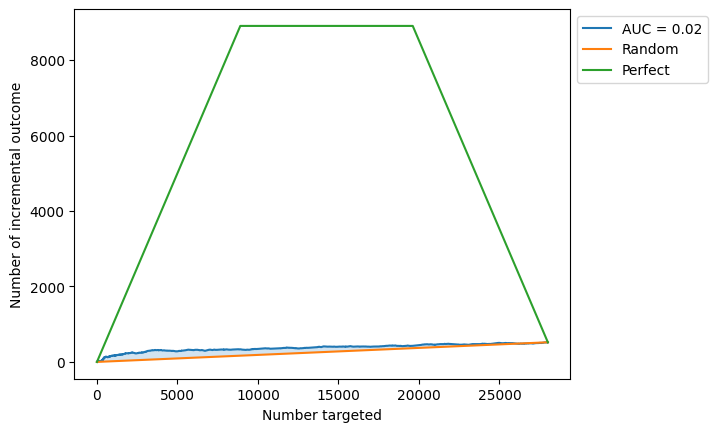

In [46]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [47]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.0194277172107723

## 2nd optimization round

In [48]:
estimator = AdaBoostClassifier(random_state=8)

In [49]:
model = ClassTransformation(estimator=estimator)

In [50]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [52]:
params = {'estimator__base_estimator':[DecisionTreeClassifier(random_state=8, max_depth=3),
                    DecisionTreeClassifier(random_state=8, max_depth=2)],
          'estimator__n_estimators': [10, 25, 30],
          'estimator__learning_rate': [0.25, 0.5, 0.8]
}

In [53]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [54]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=3, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.026 total time=   2.1s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=3, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.026 total time=   2.1s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=3, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.020 total time=   2.1s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=3, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.022 total time=   2.1s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=3, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.026 total time=   2.1s
[CV 1/5] END estimator__

[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.025 total time=   1.5s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.024 total time=   1.5s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.020 total time=   1.5s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.024 total time=   1.5s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.25, estimator__n_estimators=10;, score=0.026 total time=   1.5s
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_sta

CPU times: user 5min 37s, sys: 180 ms, total: 5min 38s
Wall time: 5min 38s


In [55]:
grid_search.best_score_

0.024961440405127797

In [56]:
grid_search.best_params_

{'estimator__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=8),
 'estimator__learning_rate': 0.5,
 'estimator__n_estimators': 25}

### Validation results. 2nd round

In [57]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

ClassTransformation(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                       random_state=8),
                                                 learning_rate=0.5,
                                                 n_estimators=25,
                                                 random_state=8))

In [58]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.00380322,  0.00639428, -0.00126266, ...,  0.00045943,
        0.00420238,  0.00053237])

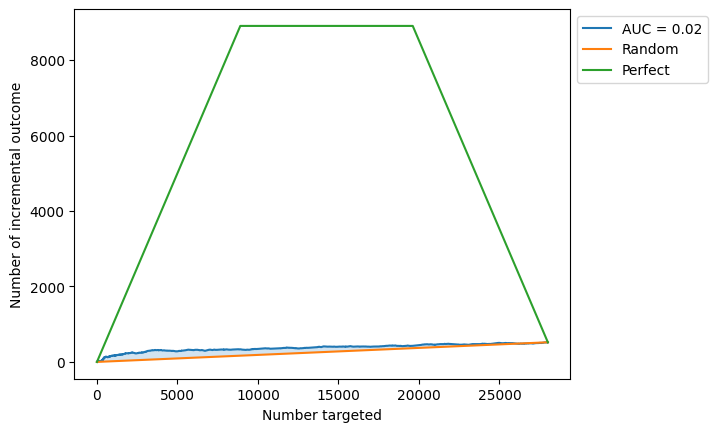

In [59]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [60]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.0194277172107723

# Prediction on the test set

Training model on the full dataset

In [61]:
X_full = df_full.loc[:, x_cols]
X_full

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
ad6561e2d8,-0.457165,0.203605,-0.072084,-0.102507,0.256063,0.070434,0.246932,0.395964,-0.601460,0.250673,-0.182574,-0.309907,0.227746,1.309908,-0.449111,-0.311067
7c1ccbf93f,-0.012094,-0.715257,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.186716,-0.874302,-0.295381,-0.663742,-1.412871,1.309908,-0.449111,-0.311067
b58fadcab6,-0.390384,0.142974,-0.072084,-0.102507,-0.602976,-1.818994,0.246932,0.395964,-0.176185,0.631720,-0.334618,0.142215,-0.655663,-0.763412,-0.449111,-0.311067
e99e6fabb9,-0.729281,-0.671353,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.732479,-0.645811,0.621791,-0.282386,2.057665,1.309908,-0.449111,-0.311067
27fb6f8520,-0.396808,0.045757,1.151475,2.431487,0.418348,0.533151,-0.403913,-2.670518,-0.442714,0.147202,-0.864322,-0.935015,-0.781865,1.309908,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,0.758315,-0.452875,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.664302,-0.633827,1.445775,0.940309,1.615961,-0.763412,-0.449111,-0.311067
f634deea4e,-0.721304,-0.211399,-0.072084,-0.102507,0.238944,-0.153212,0.246932,0.395964,-0.790863,0.222140,0.126420,-0.592975,-0.718764,-0.763412,-0.449111,-0.311067
16cb4f99b0,-0.250437,-0.558455,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.125167,-0.615512,0.219609,1.156541,0.227746,1.309908,-0.449111,-0.311067


In [62]:
treat_full = df_full.loc[:, 'treatment_flg']
treat_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

In [63]:
y_full = df_full.loc[:, 'purchased']
y_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: purchased, Length: 140027, dtype: int64

In [64]:
model_full = ClassTransformation(estimator = estimator)

In [65]:
model_full.set_params(**grid_search.best_params_)

ClassTransformation(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                       random_state=8),
                                                 learning_rate=0.5,
                                                 n_estimators=25,
                                                 random_state=8))

In [66]:
%%time
model_full = model_full.fit(X_full, y_full, treat_full)

CPU times: user 5.59 s, sys: 12 ms, total: 5.6 s
Wall time: 5.64 s


Prediction

In [67]:
X_test = pd.read_csv('clients_test_modified.csv', index_col='client_id')
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0


In [68]:
y_pred_test = model_full.predict(X_test); y_pred_test

array([-0.04007746,  0.06226942, -0.04007746, ..., -0.03051981,
       -0.03937287,  0.04678834])

In [69]:
X_test['pred'] = y_pred_test
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem,pred
client_id,,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0,-0.040077
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0,0.062269
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0,-0.040077
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0,-0.014604
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1,0.018563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0,-0.040077
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0,-0.605382
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0,-0.030520


In [70]:
X_test.pred.to_csv('submit_all_features_ada.csv')

## 3rd optimization round

In [71]:
estimator = AdaBoostClassifier(random_state=8)

In [72]:
model = ClassTransformation(estimator=estimator)

In [73]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [74]:
params = {'estimator__base_estimator':[DecisionTreeClassifier(random_state=8, max_depth=2)],
          'estimator__n_estimators': [5, 10, 15, 25],
          'estimator__learning_rate': [0.5]
}

In [75]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [76]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=5;, score=0.023 total time=   0.8s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=5;, score=0.025 total time=   0.8s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=5;, score=0.022 total time=   0.8s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=5;, score=0.026 total time=   0.8s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=5;, score=0.026 total time=   0.8s
[CV 1/5] END estimator__base_estima

In [77]:
grid_search.best_score_

0.025066638788581917

In [78]:
grid_search.best_params_

{'estimator__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=8),
 'estimator__learning_rate': 0.5,
 'estimator__n_estimators': 15}

### Validation results. 3rd round

In [79]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

ClassTransformation(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                       random_state=8),
                                                 learning_rate=0.5,
                                                 n_estimators=15,
                                                 random_state=8))

In [80]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.00647236,  0.00932275, -0.0027897 , ...,  0.00089943,
        0.01066804,  0.00095903])

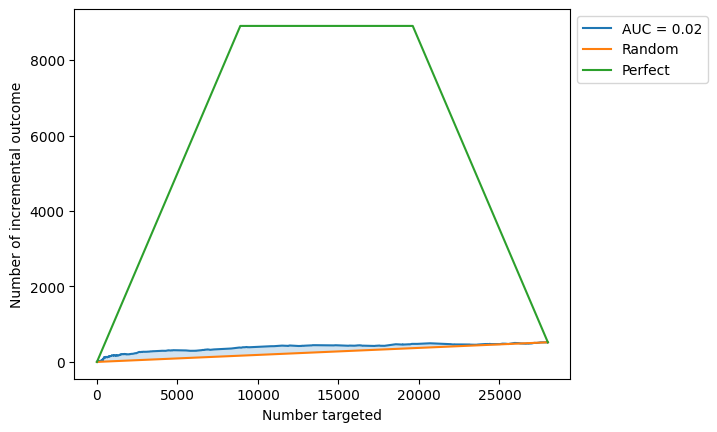

In [81]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [82]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.02244822386762713

## 4th optimization round

In [83]:
estimator = AdaBoostClassifier(random_state=8)

In [84]:
model = ClassTransformation(estimator=estimator)

In [73]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [87]:
params = {'estimator__base_estimator':[DecisionTreeClassifier(random_state=8, max_depth=2)],
          'estimator__n_estimators': list(range(11, 25)),
          'estimator__learning_rate': [0.5]
}

In [88]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [89]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=11;, score=0.022 total time=   1.6s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=11;, score=0.024 total time=   1.7s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=11;, score=0.023 total time=   1.7s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=11;, score=0.028 total time=   1.6s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=11;, score=0.024 total time=   1.6s
[CV 1/5] END estimator__base_

[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=20;, score=0.025 total time=   2.8s
[CV 2/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=20;, score=0.025 total time=   2.8s
[CV 3/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=20;, score=0.024 total time=   2.8s
[CV 4/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=20;, score=0.026 total time=   2.8s
[CV 5/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8), estimator__learning_rate=0.5, estimator__n_estimators=20;, score=0.025 total time=   2.9s
[CV 1/5] END estimator__base_estimator=DecisionTreeClassifier(max_depth=2, random_state=8)

In [90]:
grid_search.best_score_

0.02538051542374073

In [91]:
grid_search.best_params_

{'estimator__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=8),
 'estimator__learning_rate': 0.5,
 'estimator__n_estimators': 21}

### Validation results. 4th round

In [92]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

ClassTransformation(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                       random_state=8),
                                                 learning_rate=0.5,
                                                 n_estimators=21,
                                                 random_state=8))

In [93]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.00452752,  0.00761208, -0.002044  , ...,  0.00054682,
        0.004462  ,  0.00063366])

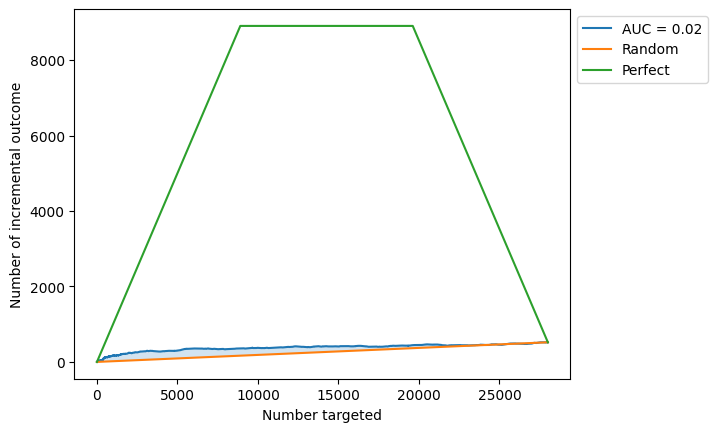

In [94]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [95]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.02022524981798688

### Overfitting?

In [100]:
estimator = AdaBoostClassifier(random_state=8,
                              base_estimator=DecisionTreeClassifier(random_state=8,
                                                                    max_depth=2),
                               n_estimators=10,
                               learning_rate=0.5
                              )

In [101]:
model = ClassTransformation(estimator=estimator)

In [102]:
model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

ClassTransformation(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                       random_state=8),
                                                 learning_rate=0.5,
                                                 n_estimators=10,
                                                 random_state=8))

In [103]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.00968471,  0.00998679, -0.00287473, ...,  0.00265897,
        0.01251084,  0.00274836])

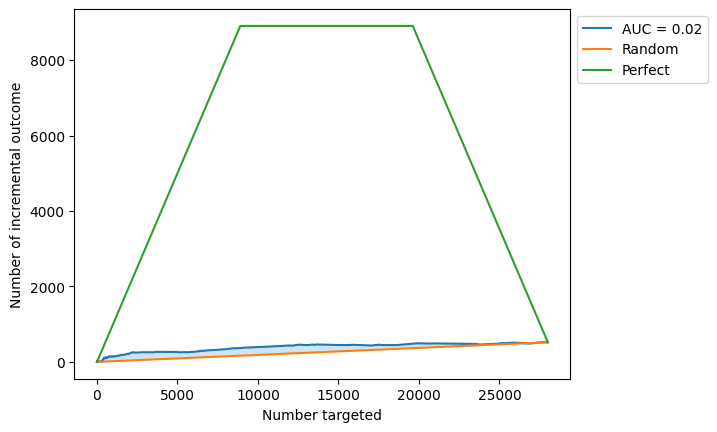

In [104]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [105]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.022358461272350992

## Cross-validating on the full dataset

In [120]:
estimator = AdaBoostClassifier(random_state=8,
                              base_estimator=DecisionTreeClassifier(random_state=8, 
                                                                    max_depth=2),
                               learning_rate=0.5
                              )

In [121]:
model = ClassTransformation(estimator=estimator)

In [122]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_full)

In [123]:
params = {'estimator__n_estimators': list(range(10, 16))}

In [124]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [125]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_full,
    y=y_full,
    treatment=treat_full
)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........estimator__n_estimators=10;, score=0.019 total time=   1.9s
[CV 2/5] END ........estimator__n_estimators=10;, score=0.026 total time=   1.9s
[CV 3/5] END ........estimator__n_estimators=10;, score=0.024 total time=   1.8s
[CV 4/5] END ........estimator__n_estimators=10;, score=0.025 total time=   1.9s
[CV 5/5] END ........estimator__n_estimators=10;, score=0.024 total time=   1.9s
[CV 1/5] END ........estimator__n_estimators=11;, score=0.020 total time=   2.0s
[CV 2/5] END ........estimator__n_estimators=11;, score=0.026 total time=   2.0s
[CV 3/5] END ........estimator__n_estimators=11;, score=0.023 total time=   2.0s
[CV 4/5] END ........estimator__n_estimators=11;, score=0.026 total time=   2.0s
[CV 5/5] END ........estimator__n_estimators=11;, score=0.023 total time=   2.0s
[CV 1/5] END ........estimator__n_estimators=12;, score=0.020 total time=   2.2s
[CV 2/5] END ........estimator__n_estimators=12;,

In [126]:
grid_search.best_score_

0.024898294629504363

In [127]:
grid_search.best_params_

{'estimator__n_estimators': 15}

# 2nd prediction on the test set

Training model on the full dataset

In [128]:
X_full = df_full.loc[:, x_cols]
X_full

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
ad6561e2d8,-0.457165,0.203605,-0.072084,-0.102507,0.256063,0.070434,0.246932,0.395964,-0.601460,0.250673,-0.182574,-0.309907,0.227746,1.309908,-0.449111,-0.311067
7c1ccbf93f,-0.012094,-0.715257,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.186716,-0.874302,-0.295381,-0.663742,-1.412871,1.309908,-0.449111,-0.311067
b58fadcab6,-0.390384,0.142974,-0.072084,-0.102507,-0.602976,-1.818994,0.246932,0.395964,-0.176185,0.631720,-0.334618,0.142215,-0.655663,-0.763412,-0.449111,-0.311067
e99e6fabb9,-0.729281,-0.671353,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.732479,-0.645811,0.621791,-0.282386,2.057665,1.309908,-0.449111,-0.311067
27fb6f8520,-0.396808,0.045757,1.151475,2.431487,0.418348,0.533151,-0.403913,-2.670518,-0.442714,0.147202,-0.864322,-0.935015,-0.781865,1.309908,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,0.758315,-0.452875,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.664302,-0.633827,1.445775,0.940309,1.615961,-0.763412,-0.449111,-0.311067
f634deea4e,-0.721304,-0.211399,-0.072084,-0.102507,0.238944,-0.153212,0.246932,0.395964,-0.790863,0.222140,0.126420,-0.592975,-0.718764,-0.763412,-0.449111,-0.311067
16cb4f99b0,-0.250437,-0.558455,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.125167,-0.615512,0.219609,1.156541,0.227746,1.309908,-0.449111,-0.311067


In [129]:
treat_full = df_full.loc[:, 'treatment_flg']
treat_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

In [130]:
y_full = df_full.loc[:, 'purchased']
y_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: purchased, Length: 140027, dtype: int64

In [131]:
estimator = AdaBoostClassifier(random_state=8,
                              base_estimator=DecisionTreeClassifier(random_state=8, 
                                                                    max_depth=2),
                               learning_rate=0.5,
                               n_estimators=15
                              )

In [132]:
model_full = ClassTransformation(estimator = estimator)

In [133]:
%%time
model_full = model_full.fit(X_full, y_full, treat_full)

CPU times: user 3.45 s, sys: 12 ms, total: 3.47 s
Wall time: 3.47 s


Prediction

In [134]:
X_test = pd.read_csv('clients_test_modified.csv', index_col='client_id')
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0


In [135]:
y_pred_test = model_full.predict(X_test); y_pred_test

array([-0.05202762,  0.10082712, -0.05202762, ..., -0.05202762,
       -0.05085456,  0.02974131])

In [136]:
X_test['pred'] = y_pred_test
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem,pred
client_id,,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0,-0.052028
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0,0.100827
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0,-0.052028
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0,-0.011138
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1,0.029741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0,-0.052028
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0,-0.824441
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0,-0.052028


In [137]:
X_test.pred.to_csv('submit_all_features_ada2.csv')

# Kaggle score is only 0.015. Not clear why